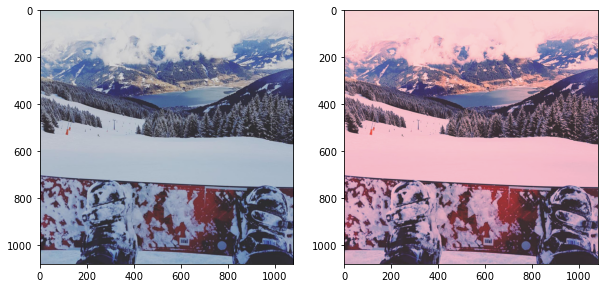

In [5]:
# 1번 과제

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def conv(origin, values):
    n_origin = np.array(origin)
    origin_shape = n_origin.shape
    f_origin = n_origin.flatten()
    adjust_origin = np.interp(f_origin, np.linspace(0, 255, len(values)), values)
    adjust_origin = adjust_origin.astype(np.uint8)
    origin = adjust_origin.reshape(origin_shape)
    
    return Image.fromarray(origin).convert('L')
    
im = Image.open('C:/Users/cau/Desktop/workspace/prac/test.jpg')

r, g, b = im.split()

values = [0, 100, 245, 255]
result = conv(r, values)

im_adjust = Image.merge('RGB', (result, g, b))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1); plt.imshow(im)
plt.subplot(1, 2, 2); plt.imshow(im_adjust)

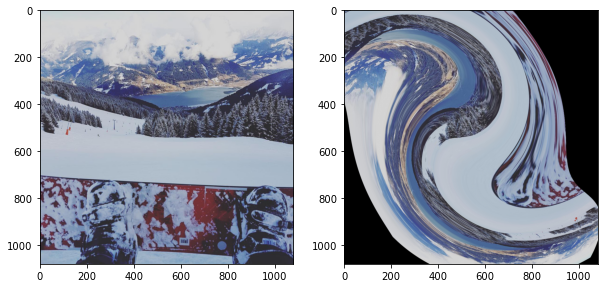

In [76]:
# 2번 과제

from skimage.io import imread
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import warp

def swirl(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0
    xy[:, 0] = -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

im = imread('C:/Users/cau/Desktop/workspace/prac/test.jpg')

warped = warp(im, swirl, map_args={'x0':500, 'y0':500, 'R':800})

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1); plt.imshow(im)
plt.subplot(1, 2, 2); plt.imshow(warped)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(-0.5, 449.5, 320.5, -0.5)

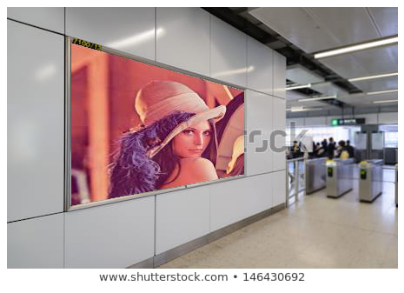

In [110]:
# 3번 과제

import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from skimage.transform import warp, ProjectiveTransform
from skimage import transform
from skimage.io import imread
from skimage import io

im1 = Image.open('../Hands-On-Image-Processing-with-Python/images/shutterstock.jpg')
im2 = imread('../Hands-On-Image-Processing-with-Python/images/lena.jpg')

tform = ProjectiveTransform()

width, height = im2.shape[0], im2.shape[1]

tmp1 = ((0, 0),
       (height-1, 0),
       (height-1, width-1),
       (0, width-1))

tmp2 = ((0, 0),
       (198, 55),
       (198, 151),
       (0, 187))

matrix = np.array(tmp1)
dst = np.array(tmp2)

tform.estimate(matrix, dst)

result = warp(im2, tform.inverse)
io.imsave('./test1.jpg', result)
im2 = Image.open('./test1.jpg')

mask = Image.new('L', im2.size, color=0)
dm = ImageDraw.Draw(mask)
dm.polygon(tmp, fill='#fff', width=4)

init = [74, 41]
im1.paste(im2, init, mask)

plt.figure(figsize=(7, 7))
plt.imshow(im1); plt.axis('off')

In [111]:
# 4번 과제

